<a href="https://colab.research.google.com/github/arshambt/MachineLearning2023/blob/main/Bachelor's_Final_Project/cGAN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jul  9 13:16:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
tf.config.list_physical_devices('GPU')

NameError: name 'tf' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

 Beheshti_9820293_CCL_HW3.rar		   Dataset_img.zip	  s-parameters.zip
'Colab Notebooks'			   Datasets		 'کلاس بندی مهره های شطرنج.pdf'
'Copy of Session 05 - Chapter 2 - 1.mp4'  'electrical circuits'
 Dataset_1st.zip			  'Getting started.pdf'


In [ ]:
!unzip gdrive/MyDrive/s-parameters.zip

Archive:  gdrive/MyDrive/s-parameters.zip
   creating: s-parameters/
  inflating: s-parameters/test_1000_1.txt  
  inflating: s-parameters/test_1000_2.txt  
  inflating: s-parameters/test_100_1.txt  
  inflating: s-parameters/test_100_2.txt  
  inflating: s-parameters/test_101_1.txt  
  inflating: s-parameters/test_101_2.txt  
  inflating: s-parameters/test_102_1.txt  
  inflating: s-parameters/test_102_2.txt  
  inflating: s-parameters/test_103_1.txt  
  inflating: s-parameters/test_103_2.txt  
  inflating: s-parameters/test_104_1.txt  
  inflating: s-parameters/test_104_2.txt  
  inflating: s-parameters/test_105_1.txt  
  inflating: s-parameters/test_105_2.txt  
  inflating: s-parameters/test_106_1.txt  
  inflating: s-parameters/test_106_2.txt  
  inflating: s-parameters/test_107_1.txt  
  inflating: s-parameters/test_107_2.txt  
  inflating: s-parameters/test_108_1.txt  
  inflating: s-parameters/test_108_2.txt  
  inflating: s-parameters/test_109_1.txt  
  inflating: s-parameters/

In [ ]:
!unzip gdrive/MyDrive/Dataset_img.zip

Archive:  gdrive/MyDrive/Dataset_img.zip
   creating: Dataset_img/
  inflating: Dataset_img/img_1000_1.png  
  inflating: Dataset_img/img_1000_2.png  
  inflating: Dataset_img/img_100_1.png  
  inflating: Dataset_img/img_100_2.png  
  inflating: Dataset_img/img_101_1.png  
  inflating: Dataset_img/img_101_2.png  
  inflating: Dataset_img/img_102_1.png  
  inflating: Dataset_img/img_102_2.png  
  inflating: Dataset_img/img_103_1.png  
  inflating: Dataset_img/img_103_2.png  
  inflating: Dataset_img/img_104_1.png  
  inflating: Dataset_img/img_104_2.png  
  inflating: Dataset_img/img_105_1.png  
  inflating: Dataset_img/img_105_2.png  
  inflating: Dataset_img/img_106_1.png  
  inflating: Dataset_img/img_106_2.png  
  inflating: Dataset_img/img_107_1.png  
  inflating: Dataset_img/img_107_2.png  
  inflating: Dataset_img/img_108_1.png  
  inflating: Dataset_img/img_108_2.png  
  inflating: Dataset_img/img_109_1.png  
  inflating: Dataset_img/img_109_2.png  
  inflating: Dataset_img/img_

In [ ]:
train_images1 = []
train_images2 = []

for i in range (1,1001):
  img1 = cv2.imread(f'Dataset_img/img_{i}_1.png')
  img2 = cv2.imread(f'Dataset_img/img_{i}_2.png')
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  #ret, img = cv2.threshold(img, 245, 255, cv2.THRESH_BINARY)
  img1 = img1.astype("float32") / 255.0
  img2 = img2.astype("float32") / 255.0
  #img = cv2.resize(img, (15,15))
  #img = cv2.resize(img, (28,28))
  #img = tf.expand_dims(img, axis=-1)

  train_images1.append(img1)
  train_images2.append(img2)

print(train_images1[2].shape)
print(len(train_images1))

(15, 15)
1000


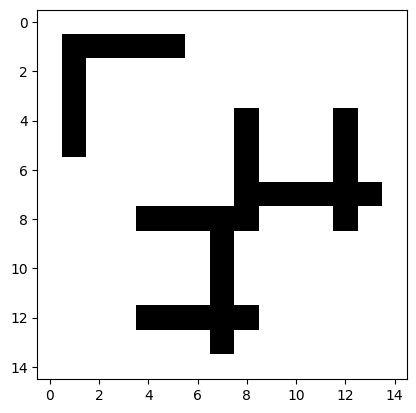

In [ ]:
#a = np.zeros((15,15,3))
J=[]

for i in range(1000):
  a = np.zeros((15,15,2))
  a[:,:,0] = train_images1[i]
  a[:,:,1] = train_images2[i]
  J.append(a)

J[1][:,:,0]
plt.imshow(J[99][:,:,1], cmap='gray')

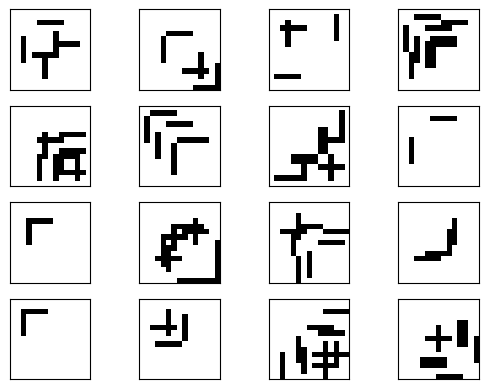

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(train_images1[i+50], cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [ ]:
m = []
ph = []

for i in range(1,1001):
  vm = np.array([])
  vph = np.array([])

  df_m = pd.read_csv(f's-parameters/test_{i}_1.txt', sep='\s+', header=None, index_col=False)
  df_ph = pd.read_csv(f's-parameters/test_{i}_2.txt', sep='\s+', header=None, index_col=False)

  v_m = pd.to_numeric(df_m[1], errors='coerce')
  v_ph = pd.to_numeric(df_ph[1], errors='coerce')

  for i in range(3):
    v_m = v_m.drop(i, axis=0)
    v_ph = v_ph.drop(i, axis=0)

  v_m = v_m.reset_index(drop=True)
  v_ph = v_ph.reset_index(drop=True)

  for i in range(497,503):
    vm = np.append(vm, v_m.iloc[i]/255.0)
    vph = np.append(vph, v_ph.iloc[i]/255.0)

  #v_m = v_m.reset_index(drop=True)
  #v_ph = v_ph.reset_index(drop=True)
  vm = vm.reshape((1,-1))
  vph = vph.reshape((1,-1))
  m.append(vm)
  ph.append(vph)

"""
  for i in range(375):
    v_m = v_m.drop(i, axis=0)
    v_ph = v_ph.drop(i, axis=0)
    v_m = v_m.drop(999-i)
    v_ph = v_ph.drop(999-i)
"""


'\n  for i in range(375):\n    v_m = v_m.drop(i, axis=0)\n    v_ph = v_ph.drop(i, axis=0)\n    v_m = v_m.drop(999-i)\n    v_ph = v_ph.drop(999-i)\n'

In [ ]:
print(len(m))
m[0].shape

1000


(1, 6)

In [ ]:
v_m = []
v_ph = []

for i in range(1000):
  m[i] = np.repeat(m[i], 225)
  ph[i] = np.repeat(ph[i], 225)
  for j in range(1, 7):
    m_r = np.reshape(m[i][225*(j-1):j*225], (15,15,1))
    ph_r = np.reshape(ph[i][225*(j-1):j*225], (15,15,1))
    v_m.append(m_r)
    v_ph.append(ph_r)

  #m[i] = np.reshape(m[i], (15,15,10))
  #ph[i] = np.reshape(ph[i], (15,15,10))
  #v_m.append(m[i])
  #v_ph.append(ph[i])


#vm_ds = tf.data.Dataset.from_tensor_slices(v_m)
#vph_ds = tf.data.Dataset.from_tensor_slices(v_ph)
#v_tr = tf.concat([v_m, v_ph], axis=3)
#v_tr = tf.cast(v_tr, tf.float32)

In [ ]:
len(v_m)

6000

In [ ]:
v_mag = v_m[0]
v_phase = v_ph[0]
vector_m = []
vector_ph = []

for i in range (1000):
  v_mag = v_m[i*6]
  v_phase = v_ph[i*6]
  for j in range(1, 6):
    v_mag = np.concatenate((v_mag, v_m[j+(6*i)]), axis=2)
    v_phase = np.concatenate((v_phase, v_ph[j+(6*i)]), axis=2)
  vector_m.append(v_mag)
  vector_ph.append(v_phase)

print(len(vector_m))
vector_ph[32][:,:,2]

1000


array([[-0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874],
       [-0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874],
       [-0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874],
       [-0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874],
       [-0.27403874, -0.27403874, -0.27403874, -0.27403874, -0.27403874,
        -0.27403874, -0.27403874, -0.27403874, 

In [ ]:
#vm_ds = tf.data.Dataset.from_tensor_slices(vector_m)
#vph_ds = tf.data.Dataset.from_tensor_slices(vector_ph)
v_tr = tf.concat([vector_m, vector_ph], axis=3)
v_tr = tf.cast(v_tr, tf.float32)
v_tr[2][:,:,11]

<tf.Tensor: shape=(15, 15), dtype=float32, numpy=
array([[0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914],
       [0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914],
       [0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914],
       [0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914],
       [0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.30470914,
        0.30470914, 0.30470914, 0.30470914, 0.30470914, 0.3047

In [ ]:
v_ph[737].shape
len(v_m)

6000

In [ ]:
train_samples = tf.concat([J,v_tr], axis=3)
train_samples.shape

TensorShape([1000, 15, 15, 14])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(train_samples)
dataset = dataset.batch(16, drop_remainder=True)
dataset = dataset.shuffle(50)
#dataset = dataset.cache()
#dataset = dataset.prefetch(buffer_size=10)
j=[]
for element in dataset:
  j.append(element)

print(j[10].shape)

(16, 15, 15, 14)


In [ ]:
for n, real_samples in enumerate(dataset):
  i = real_samples.shape

  print(i[0])

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [ ]:
z = np.zeros((15,15,6))
desired_tr = []
for j in range(16):
  #tr = tf.concat([z, vector_f], axis=2)
  desired_tr.append(z)
desired_tr = tf.cast(desired_tr, tf.float32)

z = np.zeros((1,6))
d_tr = []
for i in range(16):
  #d = tf.concat([z,f], axis=1)
  d_tr.append(z)

d_tr = tf.reshape(d_tr, (16,6,1))
d_tr = tf.cast(d_tr, tf.float32)

In [ ]:
z = np.zeros((15,15,6))

f = np.zeros(6)
f1 = []

for j in range(6):
  #f[j] = f[j] + 100 + 0.163*j
  f[j] = f[j] + 80 + 0.48*j
  f[j] = f[j]/255.0
  a1 = np.repeat(f[j], 225)
  a = np.reshape(a1, (15,15,1))
  f1.append(a)

vector_f = f1[0]
for i in range(1, 6):
  vector_f = np.concatenate((vector_f, f1[i]), axis=2)

desired_tr = []

for j in range(16):
  tr = tf.concat([z, vector_f], axis=2)
  desired_tr.append(tr)

desired_tr = tf.cast(desired_tr, tf.float32)
desired_tr[1][:,:,6]



<tf.Tensor: shape=(15, 15), dtype=float32, numpy=
array([[0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255],
       [0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255],
       [0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255],
       [0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255],
       [0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255, 0.3137255,
        0.3137255, 0.3137255, 0.3137255],


In [ ]:
desired_tr[1].shape

TensorShape([15, 15, 12])

# Process

In [ ]:
z = np.zeros((1,6))
f = tf.reshape(f, (1,6))
d_tr = []
for i in range(16):
  d = tf.concat([z,f], axis=1)
  d_tr.append(d)

d_tr = tf.reshape(d_tr, (16,12,1))
d_tr = tf.cast(d_tr, tf.float32)
d_tr.shape

TensorShape([16, 12, 1])

In [ ]:
d_tr[0]

<tf.Tensor: shape=(12, 1), dtype=float32, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.3137255 ],
       [0.31560785],
       [0.3174902 ],
       [0.31937253],
       [0.3212549 ],
       [0.32313725]], dtype=float32)>

# model paper

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation

# Discriminator model

d_model = Sequential()
d_model.add(Conv2D(64, kernel_size= (3,3), strides=(2,2), padding='same', input_shape=(15,15,14)))
d_model.add(LeakyReLU(alpha=0.2))
d_model.add(BatchNormalization())
#d_model.add(Dropout(0.4))

d_model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='same'))
d_model.add(LeakyReLU(alpha=0.2))
d_model.add(BatchNormalization())
#d_model.add(Dropout(0.4))


d_model.add(Conv2D(256, kernel_size=(3,3), strides=(2,2), padding='same'))
d_model.add(LeakyReLU(alpha=0.2))
d_model.add(BatchNormalization())
#d_model.add(Dropout(0.4))


d_model.add(Conv2D(512, kernel_size=(3,3), strides=(2,2), padding='same'))
d_model.add(LeakyReLU(alpha=0.2))
d_model.add(BatchNormalization())
#d_model.add(Dropout(0.4))


d_model.add(Flatten())
d_model.add(BatchNormalization())
#d_model.add(Dropout(0.4))

d_model.add(Dense(1, activation='sigmoid'))


# Generator model
latent_dim = 128

g_model = Sequential()

g_model.add(Dense(1*1*140, input_dim=d_tr.shape[1]+latent_dim))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Reshape((1,1,140)))
g_model.add(Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2DTranspose(64, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2DTranspose(64, kernel_size=(8,8), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2D(2, (4,2), activation='tanh', padding='same'))

In [ ]:
g_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 140)               19740     
                                                                 
 leaky_re_lu_128 (LeakyReLU  (None, 140)               0         
 )                                                               
                                                                 
 batch_normalization_137 (B  (None, 140)               560       
 atchNormalization)                                              
                                                                 
 reshape_18 (Reshape)        (None, 1, 1, 140)         0         
                                                                 
 conv2d_transpose_54 (Conv2  (None, 2, 2, 256)         573696    
 DTranspose)                                                     
                                                     

# model test

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation

# Discriminator model
d_model = Sequential()
d_model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="valid", input_shape=(15,15,14)))
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())

d_model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="valid"))
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())

d_model.add(Conv2D(64, (4, 4), strides=(1, 1), padding="same"))
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())


d_model.add(Flatten())
d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Dense(1, activation='sigmoid'))


# Create the generator
latent_dim = 128
g_model = Sequential()
g_model.add(Dense(5*5*140, input_dim=d_tr.shape[1]+latent_dim))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())



g_model.add(Reshape((5,5,140)))
g_model.add(Conv2DTranspose(128, kernel_size=(3,3), strides=(2,2), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(5,5), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


#_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1), padding='valid'))
#g_model.add(LeakyReLU(alpha=0.2))
#g_model.add(BatchNormalization())

#g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))

#g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))

g_model.add(Conv2D(2, (4,4), activation='tanh', padding='same'))

# model1

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, GaussianNoise
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation

# Discriminator model
d_model = Sequential()
d_model.add(Conv2D(32, (4, 4), strides=(2, 2), padding="same", input_shape=(15,15,14)))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(GaussianNoise(0.15))
#d_model.add(Dropout(0.3))
#d_model.add(BatchNormalization())

d_model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="same"))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(GaussianNoise(0.15))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Conv2D(128, (4, 4), strides=(2, 2), padding="same"))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(GaussianNoise(0.15))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

#d_model.add(Conv2D(256, (4, 4), strides=(2, 2), padding="same"))
#d_model.add(BatchNormalization())
#d_model.add(LeakyReLU(alpha=0.15))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())


d_model.add(Flatten())
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())

d_model.add(Dense(1, activation='sigmoid'))


# Create the generator
latent_dim = 128

g_model = Sequential()
## input shape!!
g_model.add(Dense(1*1*140, input_dim=d_tr.shape[1]+latent_dim))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Reshape((1,1,140)))
g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(BatchNormalization())
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(Dropout(0.4))
#g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(64, kernel_size=(4,4), strides=(2,2), padding='valid'))
g_model.add(BatchNormalization())
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(Dropout(0.4))
#g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(32, kernel_size=(4,4), strides=(2,2), padding='valid'))
g_model.add(BatchNormalization())
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(Dropout(0.4))
#g_model.add(BatchNormalization())

#g_model.add(Conv2DTranspose(64, kernel_size=(8,8), strides=(1,1), padding='valid'))
#g_model.add(BatchNormalization())
#g_model.add(LeakyReLU(alpha=0.15))
#g_model.add(BatchNormalization())

#g_model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same'))
#g_model.add(BatchNormalization())
#g_model.add(LeakyReLU(alpha=0.2))
#g_model.add(BatchNormalization())

#g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))
#g_model.add(LeakyReLU(alpha=0.2))

#g_model.add(Conv2DTranspose(2, kernel_size=(3,3), strides=(1,1), padding='same'))
#g_model.add(BatchNormalization())
#g_model.add(LeakyReLU(alpha=0.15))

g_model.add(Conv2DTranspose(2, (2,2), activation='tanh', padding='valid'))

In [ ]:
g_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 148)               20868     
                                                                 
 leaky_re_lu_66 (LeakyReLU)  (None, 148)               0         
                                                                 
 batch_normalization_66 (Ba  (None, 148)               592       
 tchNormalization)                                               
                                                                 
 reshape_9 (Reshape)         (None, 1, 1, 148)         0         
                                                                 
 conv2d_transpose_37 (Conv2  (None, 2, 2, 128)         303232    
 DTranspose)                                                     
                                                                 
 batch_normalization_67 (Ba  (None, 2, 2, 128)       

In [ ]:
output = d_model(train_samples)
output

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[1.18207405e-04],
       [9.99919295e-01],
       [2.54665883e-06],
       [9.99998331e-01],
       [9.99998629e-01],
       [9.99903500e-01],
       [9.99998987e-01],
       [9.99121189e-01],
       [9.99992251e-01],
       [9.99998569e-01],
       [1.67543272e-04],
       [9.99537349e-01],
       [9.98082995e-01],
       [9.99262035e-01],
       [3.63527006e-03],
       [9.99998868e-01],
       [9.99998808e-01],
       [9.99998689e-01],
       [1.00000000e+00],
       [9.99985576e-01],
       [1.00000000e+00],
       [9.99996126e-01],
       [9.99999166e-01],
       [9.99997556e-01],
       [9.99976516e-01],
       [9.99923587e-01],
       [1.00000000e+00],
       [9.99988079e-01],
       [8.55340436e-02],
       [9.99992967e-01],
       [8.48628163e-01],
       [2.61108633e-02],
       [9.99847949e-01],
       [6.74315256e-11],
       [9.99995530e-01],
       [9.99976337e-01],
       [9.99956727e-01],
       [9.99943614e-01],

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model


g_opt = Adam(learning_rate=0.0003)
d_opt = Adam(learning_rate=0.00003)

loss_function = BinaryCrossentropy()

# cGAN

In [ ]:
class GAN(Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_tracker = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_tracker = tf.keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):

        # Sample random points in the latent space
      batch_size = tf.shape(real_images)[0]
      #batch_size = 16
      random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))
      g_input = tf.concat([d_tr, random_latent_vectors], axis=1)

        # Decode them to fake images
      generated_samples = self.generator(g_input, training=False)
      generated_samples = tf.concat([generated_samples, desired_tr], axis=3)

      with tf.GradientTape() as d_tape:

        # Combine them with real images
        combined_images = tf.concat([generated_samples, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)

        # Add random noise to the labels - important trick!
        #labels += 0.05 * tf.random.uniform(tf.shape(labels))

        noise_real = -0.15*tf.random.uniform((batch_size,1))
        noise_fake = 0.15*tf.random.uniform((batch_size,1))
        labels += tf.concat([noise_fake, noise_real], axis=0)

        # Train the discriminator
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(combined_images, training=True)
        d_loss = self.loss_fn(labels, predictions)
      grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
      self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

      with tf.GradientTape() as g_tape:

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))
        g_input = tf.concat([d_tr, random_latent_vectors], axis=1)
        generated_samples = self.generator(g_input, training=True)
        generated_samples = tf.concat([generated_samples, desired_tr], axis=3)

        ## THRESHOLD FOR GENERATOR'S OUTPUT ##
      #generated_samples = tf.cast(tf.math.greater_equal(generated_samples, threshold), dtype=tf.float32)

        # Assemble labels that say "all real images"
        misleading_labels = tf.ones((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(generated_samples, training= False)
        g_loss = self.loss_fn(misleading_labels, predictions)
      grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        # Update metrics and return their value.
      self.d_loss_tracker.update_state(d_loss)
      self.g_loss_tracker.update_state(g_loss)
      return {
            "d_loss": self.d_loss_tracker.result(),
            "g_loss": self.g_loss_tracker.result(),
        }


# cGAN_separate_loss

In [ ]:
class GAN(Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_tracker = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_tracker = tf.keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):

        # Sample random points in the latent space
      batch_size = tf.shape(real_images)[0]
      #batch_size = 16
      random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))
      g_input = tf.concat([d_tr, random_latent_vectors], axis=1)

        # Decode them to fake images
      generated_samples = self.generator(g_input, training=False)
      generated_samples = tf.concat([generated_samples, desired_tr], axis=3)

      with tf.GradientTape() as d_tape:

        # Combine them with real images
        #combined_images = tf.concat([generated_samples, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        real_labels = tf.ones((batch_size, 1))

        # Add random noise to the labels - important trick!
        #labels += 0.05 * tf.random.uniform(tf.shape(labels))

        noise_real = -0.15*tf.random.uniform((batch_size,1))
        #noise_fake = 0.15*tf.random.uniform((batch_size,1))
        real_labels += noise_real

        # Train the discriminator
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(real_images, training=True)
        d_loss = self.loss_fn(real_labels, predictions)
      grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
      self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

      with tf.GradientTape() as d_tape:
        fake_labels = tf.zeros((batch_size, 1))
        noise_fake = 0.15*tf.random.uniform((batch_size,1))
        fake_labels += noise_fake
        predictions = self.discriminator(generated_samples, training=True)
        d_loss = self.loss_fn(fake_labels, predictions)
      grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
      self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

      with tf.GradientTape() as g_tape:

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))
        g_input = tf.concat([d_tr, random_latent_vectors], axis=1)
        generated_samples = self.generator(g_input, training=True)
        generated_samples = tf.concat([generated_samples, desired_tr], axis=3)

        ## THRESHOLD FOR GENERATOR'S OUTPUT ##
      #generated_samples = tf.cast(tf.math.greater_equal(generated_samples, threshold), dtype=tf.float32)

        # Assemble labels that say "all real images"
        misleading_labels = tf.ones((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(generated_samples, training= False)
        g_loss = self.loss_fn(misleading_labels, predictions)
      grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        # Update metrics and return their value.
      self.d_loss_tracker.update_state(d_loss)
      self.g_loss_tracker.update_state(g_loss)
      return {
            "d_loss": self.d_loss_tracker.result(),
            "g_loss": self.g_loss_tracker.result(),
        }

# Callback

In [ ]:
c=[]

In [ ]:
from tensorflow.keras.callbacks import Callback

class Generated_img(Callback):
  def __init__(self, generator, latent_dim, desired_transmission_response, num_samples=4, img_size=(15,15,1), save_path='generated_images'):
    self.generator = generator
    self.latent_dim = latent_dim
    self.num_samples = num_samples
    self.desired_transmission_response = desired_transmission_response
    self.save_path = save_path
    img_size=(15,15,2)
    self.epoch = 0

  def on_epoch_end(self, epoch, logs=None):
    #c=[]
    if(epoch+1) % 100 == 0:
      random_latent_vectors = tf.random.normal(shape=(16, latent_dim, 1))
      g_input = tf.concat([self.desired_transmission_response, random_latent_vectors], axis=1)
      generated_images = g_model(g_input)
      c.append(generated_images[i])
      #for i in range(self.num_samples):
        #image = generated_images[i][:,:,0]
        #file_path = f'{self.save_path}/generated_image_{self.epoch}_{i+1}.png'
        #plt.imsave(file_path, image)

        #print(f'Saved generated images at epoch {self.epoch}')

    self.epoch += 1

# train

In [ ]:
custom_callback = Generated_img(g_model, latent_dim=128, desired_transmission_response=d_tr, save_path='generated_images')

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model


g_opt = Adam(learning_rate=0.0003)
d_opt = Adam(learning_rate=0.0003)

loss_function = BinaryCrossentropy()



gan = GAN(d_model, g_model, latent_dim=128)

gan.compile(
    d_optimizer = d_opt,
    g_optimizer = g_opt,
    loss_fn = loss_function,
    )

history = gan.fit(dataset, epochs = 700, callbacks = [custom_callback])

Epoch 1/700
62/62 [==============================] - 151s 18ms/step - d_loss: 0.7509 - g_loss: 0.1444
Epoch 2/700
62/62 [==============================] - 1s 16ms/step - d_loss: 0.7153 - g_loss: 0.1167
Epoch 3/700
62/62 [==============================] - 1s 17ms/step - d_loss: 0.7237 - g_loss: 0.1235
Epoch 4/700
62/62 [==============================] - 1s 16ms/step - d_loss: 0.7081 - g_loss: 0.1212
Epoch 5/700
62/62 [==============================] - 1s 16ms/step - d_loss: 0.7131 - g_loss: 0.1862
Epoch 6/700
62/62 [==============================] - 1s 18ms/step - d_loss: 0.7027 - g_loss: 0.2608
Epoch 7/700
62/62 [==============================] - 1s 21ms/step - d_loss: 0.7034 - g_loss: 0.2426
Epoch 8/700
62/62 [==============================] - 1s 20ms/step - d_loss: 0.7132 - g_loss: 0.1480
Epoch 9/700
62/62 [==============================] - 1s 16ms/step - d_loss: 0.7070 - g_loss: 0.2263
Epoch 10/700
62/62 [==============================] - 1s 16ms/step - d_loss: 0.7076 - g_loss: 0.23

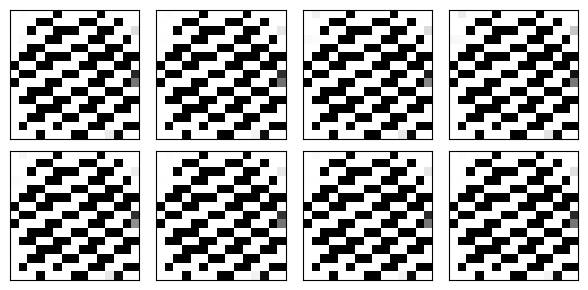

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

batch_size=16
random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim, 1))
g_input = tf.concat([d_tr, random_latent_vectors], axis=1)
generated_images = g_model(g_input)
#generated_images = tf.where(generated_images >= 0.5, tf.ones_like(generated_images), tf.zeros_like(generated_images))
# Assuming you have a list of 8 generated images named `generated_images`
num_samples = len(generated_images)

# Create subplot grid
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3))

# Display generated images
for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        ax.imshow(generated_images[i][:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

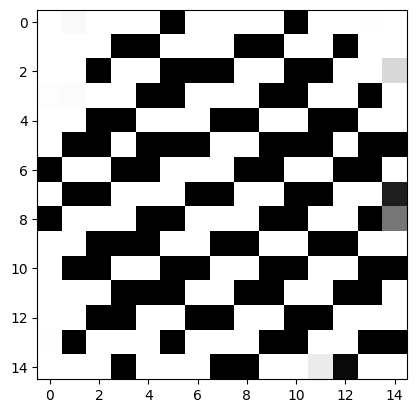

In [ ]:
batch_size=16
random_latent_vectors = tf.random.normal(shape=(batch_size, 128, 1))
g_input = tf.concat([d_tr, random_latent_vectors], axis=1)
generated_images = g_model(g_input)
#generated_images = tf.where(generated_images >= 0.5, tf.ones_like(generated_images), tf.zeros_like(generated_images))

# Assuming you have a list of 8 generated images named `generated_images`
num_samples = len(generated_images)

# Create subplot grid
plt.imshow(generated_images[10][:,: ,0], cmap='gray')

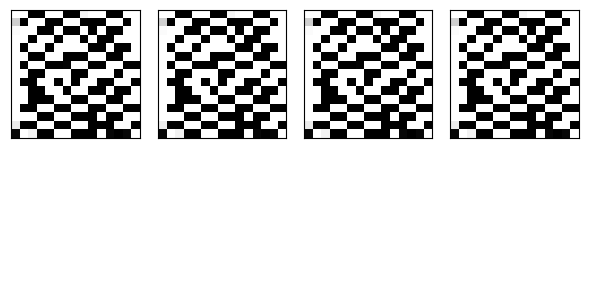

In [ ]:
num_samples = 4

# Create subplot grid
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3))

# Display generated images
for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        ax.imshow(c[6][:,:,1], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()